# Rolling Planning mit Summe-Tardiness

In [1]:
import json
import pandas as pd
pd.set_option('display.max_rows', 40)

import utils.rolling_planning.rescheduling as reschedul

## Laden der Initialisierungsdaten

In [2]:
df_jssp = pd.read_csv("data/07_tardiness_init_jssp.csv")
df_jssp

,Job,Operation,Machine,Processing Time
0,Job_000,0,M0,29
1,Job_000,1,M1,78
2,Job_000,2,M2,9
3,Job_000,3,M3,36
4,Job_000,4,M4,49
...,...,...,...,...
1515,Job_151,5,M9,76
1516,Job_151,6,M5,47
1517,Job_151,7,M3,52
1518,Job_151,8,M4,90


In [3]:
df_times = pd.read_csv("data/07_tardiness_init_times.csv")
df_times

,Job,Arrival,Deadline
0,Job_000,0.00,1069.346415
1,Job_001,88.05,1468.725117
2,Job_002,152.78,1690.473072
3,Job_003,207.97,1981.190004
4,Job_004,246.61,1310.542002
...,...,...,...
147,Job_147,11270.89,13044.110004
148,Job_148,11277.28,12341.212002
149,Job_149,11278.72,12816.413072
150,Job_150,11404.04,12473.386415


### Tag 0 

In [4]:
df_plan = pd.read_csv("data/07_tardiness_init_plan.csv")
df_plan

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,Job_000,0,0.00,1069.346415,M0,652.63,29.0,681.63,0.0
1,Job_000,1,0.00,1069.346415,M1,698.63,78.0,776.63,0.0
2,Job_000,2,0.00,1069.346415,M2,814.63,9.0,823.63,0.0
3,Job_000,3,0.00,1069.346415,M3,823.63,36.0,859.63,0.0
4,Job_000,4,0.00,1069.346415,M4,859.63,49.0,908.63,0.0
...,...,...,...,...,...,...,...,...,...
595,Job_150,5,11404.04,12473.386415,M5,11605.04,11.0,11616.04,0.0
596,Job_150,6,11404.04,12473.386415,M6,11616.04,62.0,11678.04,0.0
597,Job_150,7,11404.04,12473.386415,M7,11678.04,56.0,11734.04,0.0
598,Job_150,8,11404.04,12473.386415,M8,11734.04,44.0,11778.04,0.0


In [5]:
df_execution = pd.read_csv("data/07_tardiness_init_execution.csv")
df_execution

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
0,Job_000,0,0.00,M0,652.63,13.20,665.83,665.83
1,Job_000,1,0.00,M1,745.39,80.44,825.83,825.83
2,Job_000,2,0.00,M2,912.43,7.97,920.40,920.40
3,Job_000,3,0.00,M3,920.40,69.57,989.97,989.97
4,Job_000,4,0.00,M4,1006.70,46.81,1053.51,1053.51
...,...,...,...,...,...,...,...,...
65,Job_012,2,1003.56,M4,1136.56,48.72,181.72,1185.28
66,Job_012,3,1003.56,M9,1310.43,14.90,321.77,1325.33
67,Job_014,0,1190.89,M1,1190.89,55.87,55.87,1246.76
68,Job_017,0,1324.04,M0,1384.59,33.04,93.59,1417.63


In [6]:
df_undone = pd.read_csv("data/07_tardiness_init_undone.csv")
df_undone

,Job,Operation,Arrival,Machine,Planned Start,Processing Time
0,Job_002,3,152.78,M2,1332.56,74.0
1,Job_010,5,891.94,M6,1423.89,88.0
2,Job_001,8,88.05,M7,1437.89,72.0
3,Job_019,1,1440.00,M1,1469.00,78.0
4,Job_005,6,319.39,M0,1469.00,47.0
...,...,...,...,...,...,...
525,Job_150,5,11404.04,M5,11605.04,11.0
526,Job_150,6,11404.04,M6,11616.04,62.0
527,Job_150,7,11404.04,M7,11678.04,56.0
528,Job_150,8,11404.04,M8,11734.04,44.0


## Settings

In [7]:
solver_limit = 60*60*4 # 4 h
solver_limit

notebook_prefix = "07a"

## Params

In [8]:
# fix
day_length = 1440
horizon_days = 3

## Rescheduling für Tage 1-4

bi_criteria_sum_tardiness_deviation ...

Solver-Informationen:
  Zielfunktionswert       : 125488.5963
  Solver-Status           : Optimal
  Anzahl Variablen        : 29743
  Anzahl Constraints      : 58577


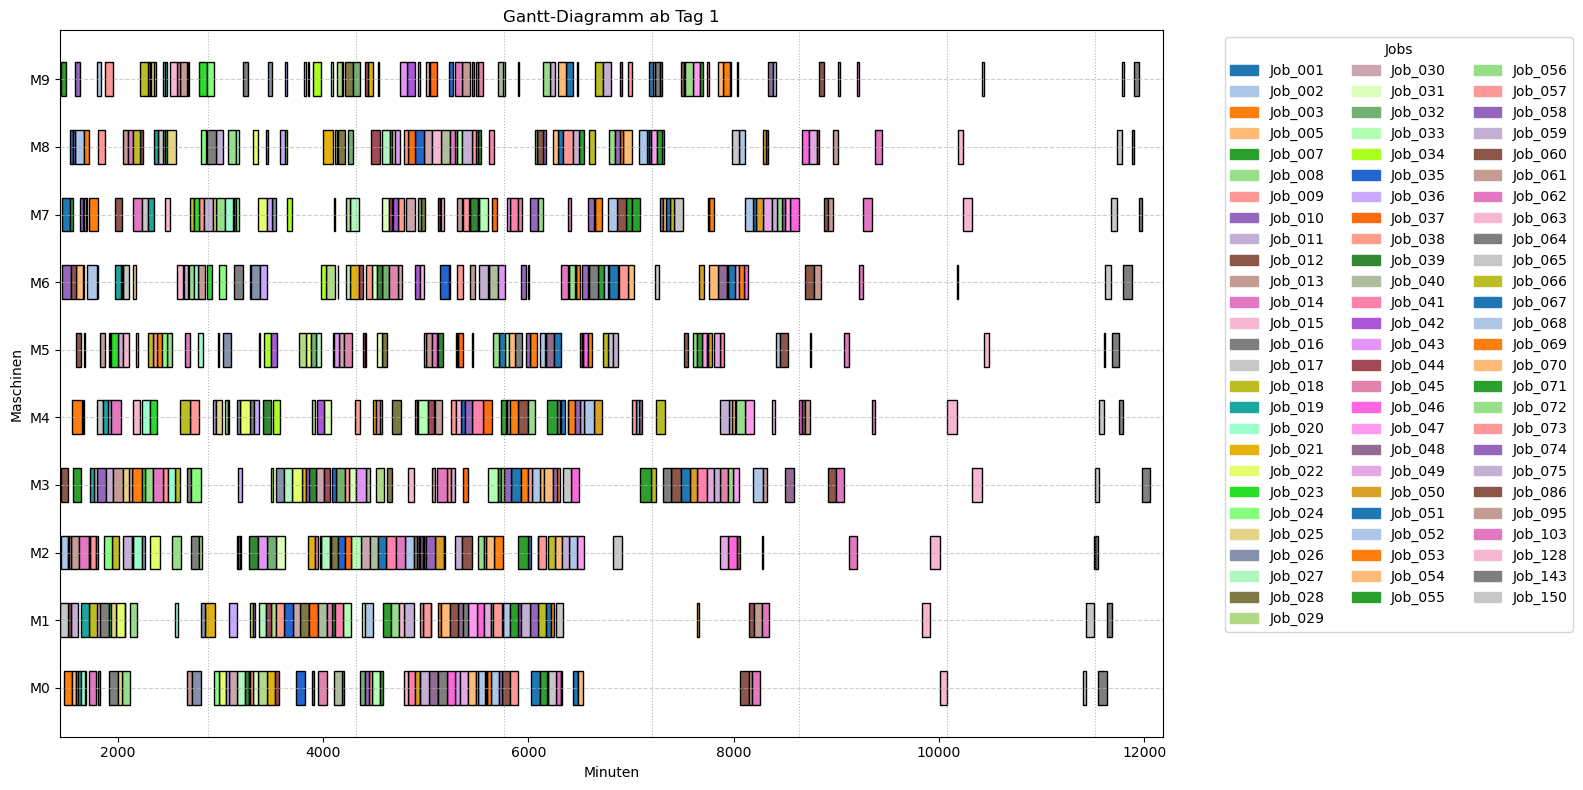

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.

[24:00:00] Job_017 started on M1
[24:06:25] Job_007 started on M9
[24:06:34] Job_002 started on M2
[24:06:34] Job_012 started on M3
[24:20:40] Job_001 started on M7
[24:22:19] Job_010 started on M6
[24:40:00] Job_003 started on M0
[24:43:42] Job_002 finished on M2 (after 37 minutes 08 seconds)
[25:18:23] Job_010 finished on M6 (after 56 minutes 05 seconds)
[25:22:09] Job_007 finished on M9 (after 75 minutes 43 seconds)
[25:29:34] Job_015 started on M2
[25:39:16] Job_015 finished on M2 (after 09 minutes 42 seconds)
[25:43:34] Job_013 started on M2
[25:45:58] Job_017 finished on M1 (after 105 minutes 59 seconds)
[25:46:00] Job_011 started on M1
[26:02:40] Job_010 started on M8
[26:07:22] Job_001 finished on M7 (after 106 minutes 42 seconds)
[26:07:22] Job_007 started o

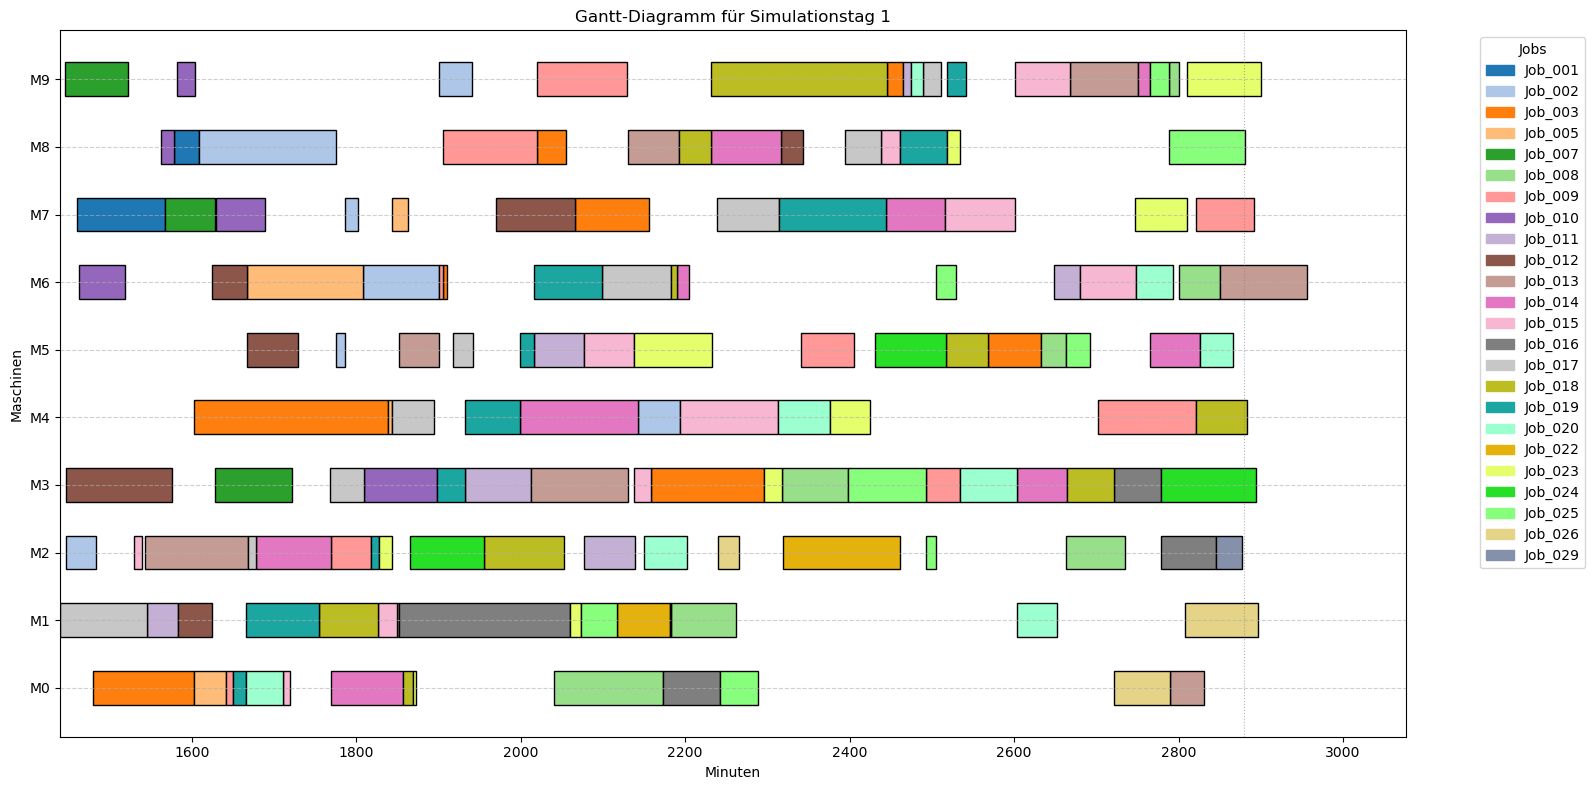

bi_criteria_sum_tardiness_deviation ...

Solver-Informationen:
  Zielfunktionswert       : 170428.3216
  Solver-Status           : Optimal
  Anzahl Variablen        : 34616
  Anzahl Constraints      : 68246


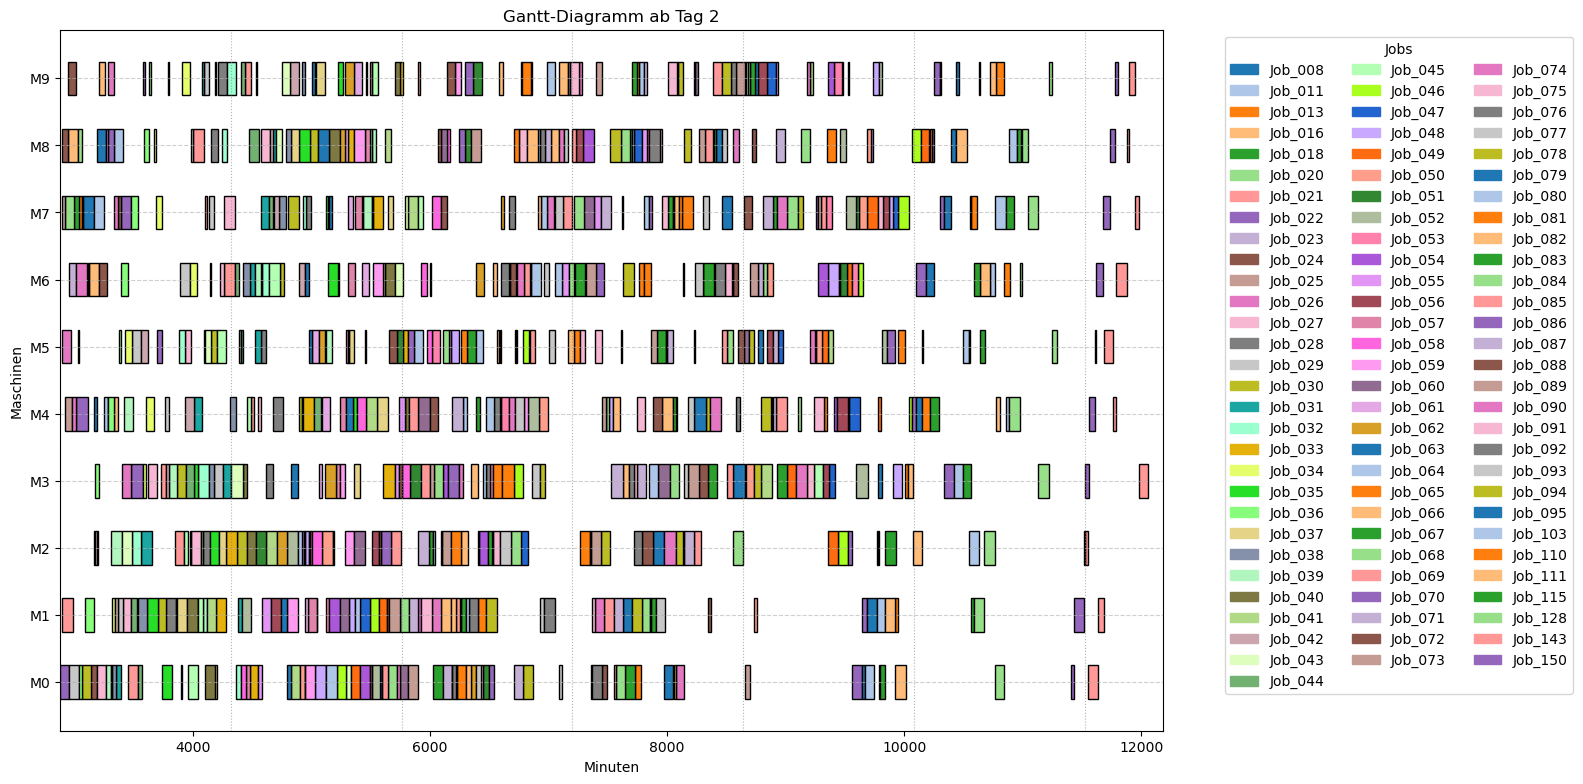

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.

[48:00:00] Job_022 started on M0
[48:11:28] Job_025 started on M7
[48:14:16] Job_024 started on M8
[48:17:07] Job_021 started on M1
[48:17:07] Job_026 started on M5
[48:53:06] Job_024 finished on M8 (after 38 minutes 49 seconds)
[48:58:15] Job_025 finished on M7 (after 46 minutes 47 seconds)
[48:58:15] Job_020 started on M7
[48:58:15] Job_025 started on M4
[49:02:16] Job_016 started on M8
[49:02:16] Job_024 started on M9
[49:08:16] Job_026 finished on M5 (after 51 minutes 10 seconds)
[49:16:35] Job_023 started on M6
[49:18:09] Job_022 finished on M0 (after 78 minutes 10 seconds)
[49:18:09] Job_029 started on M0
[49:20:32] Job_021 finished on M1 (after 63 minutes 25 seconds)
[49:48:50] Job_020 finished on M7 (after 50 minutes 35 seconds)
[49:53:28] Job_018 started on 

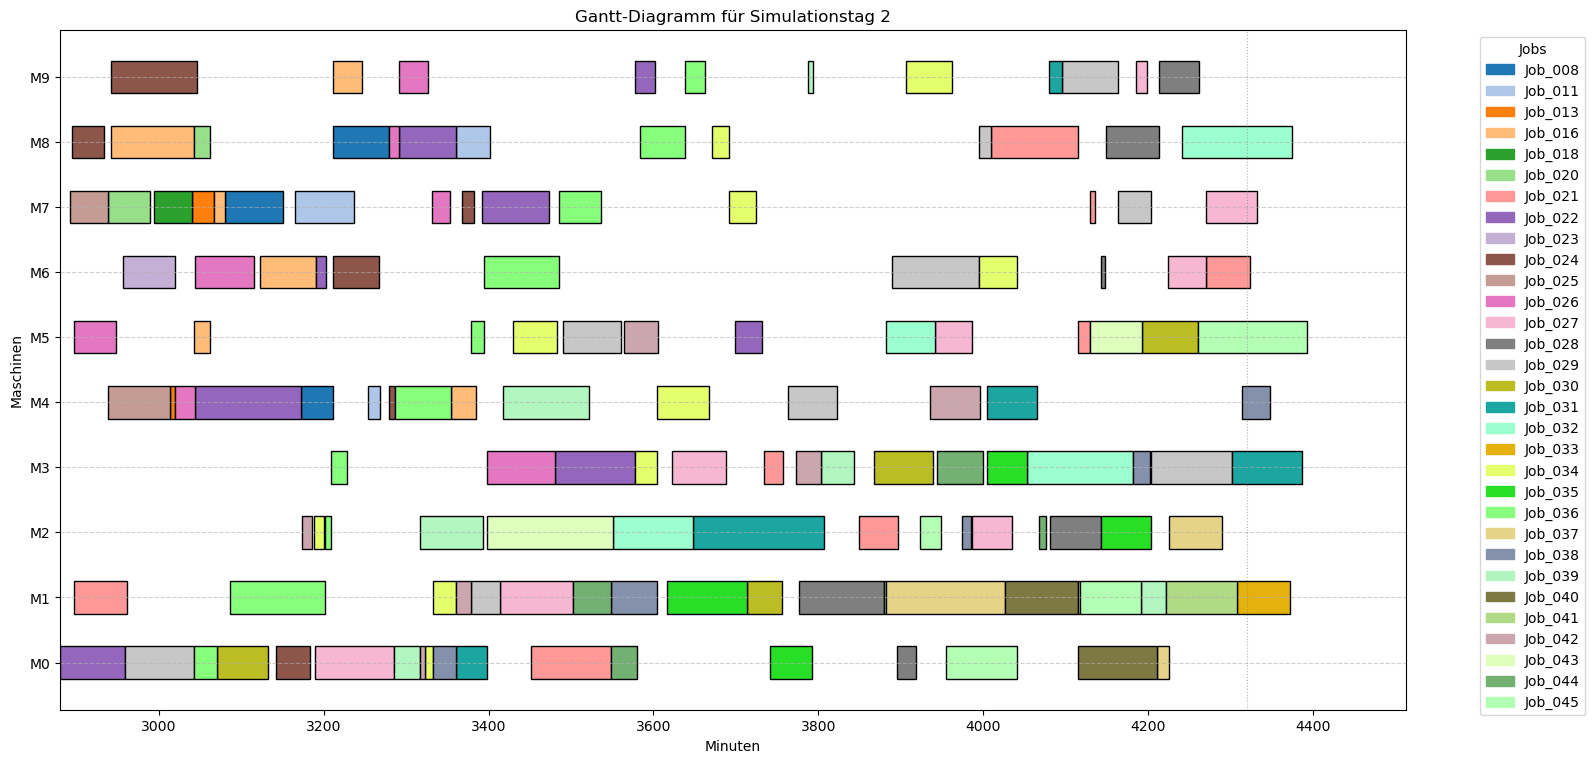

bi_criteria_sum_tardiness_deviation ...

Solver-Informationen:
  Zielfunktionswert       : 369603.8481
  Solver-Status           : Optimal
  Anzahl Variablen        : 37689
  Anzahl Constraints      : 74349


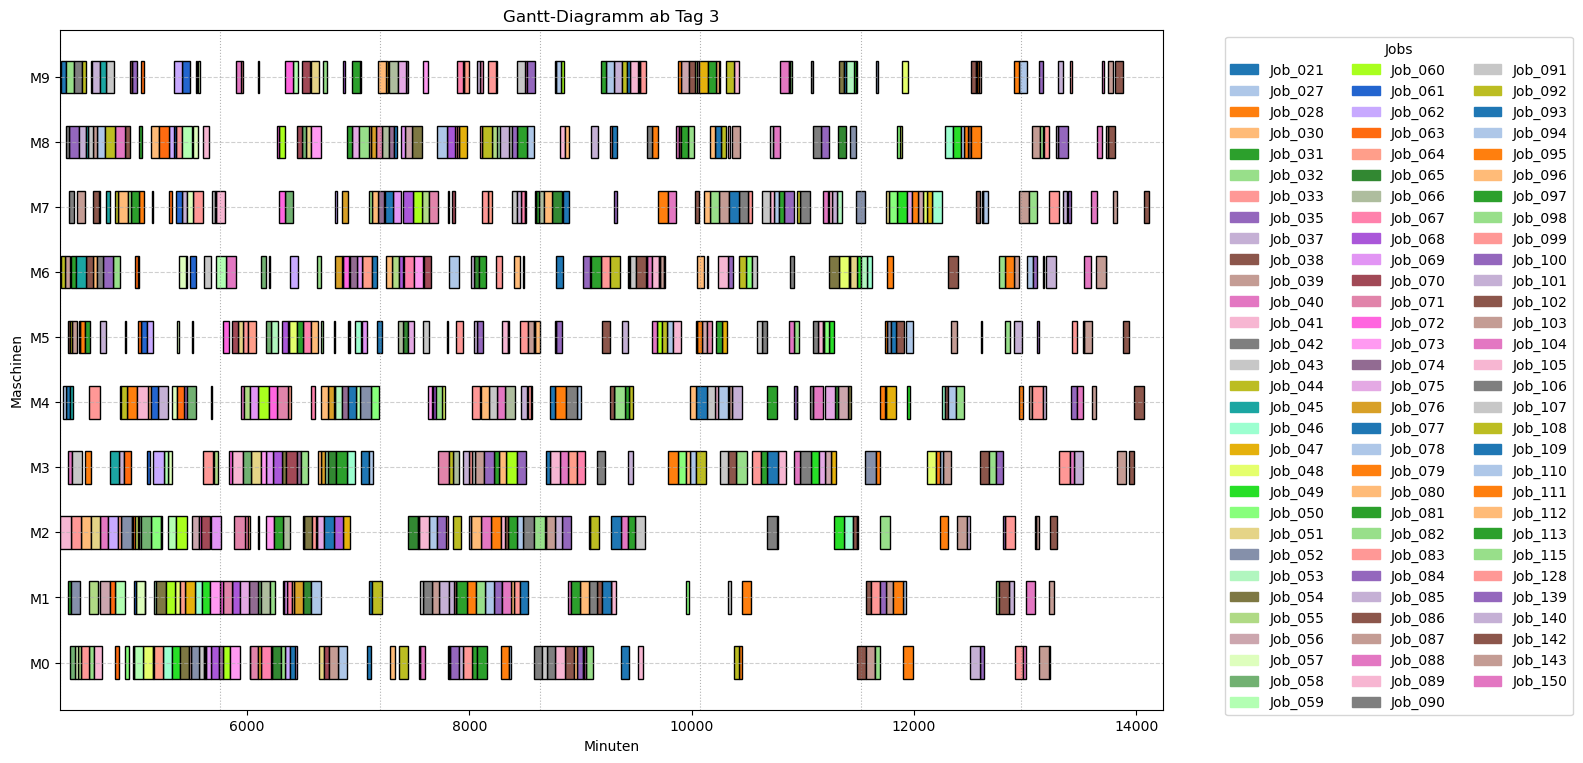

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.

[72:00:00] Job_041 started on M2
[72:03:38] Job_021 started on M9
[72:03:38] Job_037 started on M6
[72:13:08] Job_037 finished on M6 (after 09 minutes 30 seconds)
[72:13:08] Job_044 started on M6
[72:27:57] Job_027 started on M4
[72:46:08] Job_021 finished on M9 (after 42 minutes 30 seconds)
[72:55:21] Job_032 started on M9
[72:55:21] Job_042 started on M8
[73:05:55] Job_027 finished on M4 (after 37 minutes 58 seconds)
[73:05:55] Job_021 started on M4
[73:07:00] Job_031 started on M1
[73:07:00] Job_040 started on M3
[73:10:21] Job_042 finished on M8 (after 15 minutes)
[73:11:43] Job_044 finished on M6 (after 58 minutes 34 seconds)
[73:11:43] Job_039 started on M6
[73:13:21] Job_038 started on M5
[73:16:21] Job_035 started on M8
[73:16:21] Job_042 started on M7
[73:19

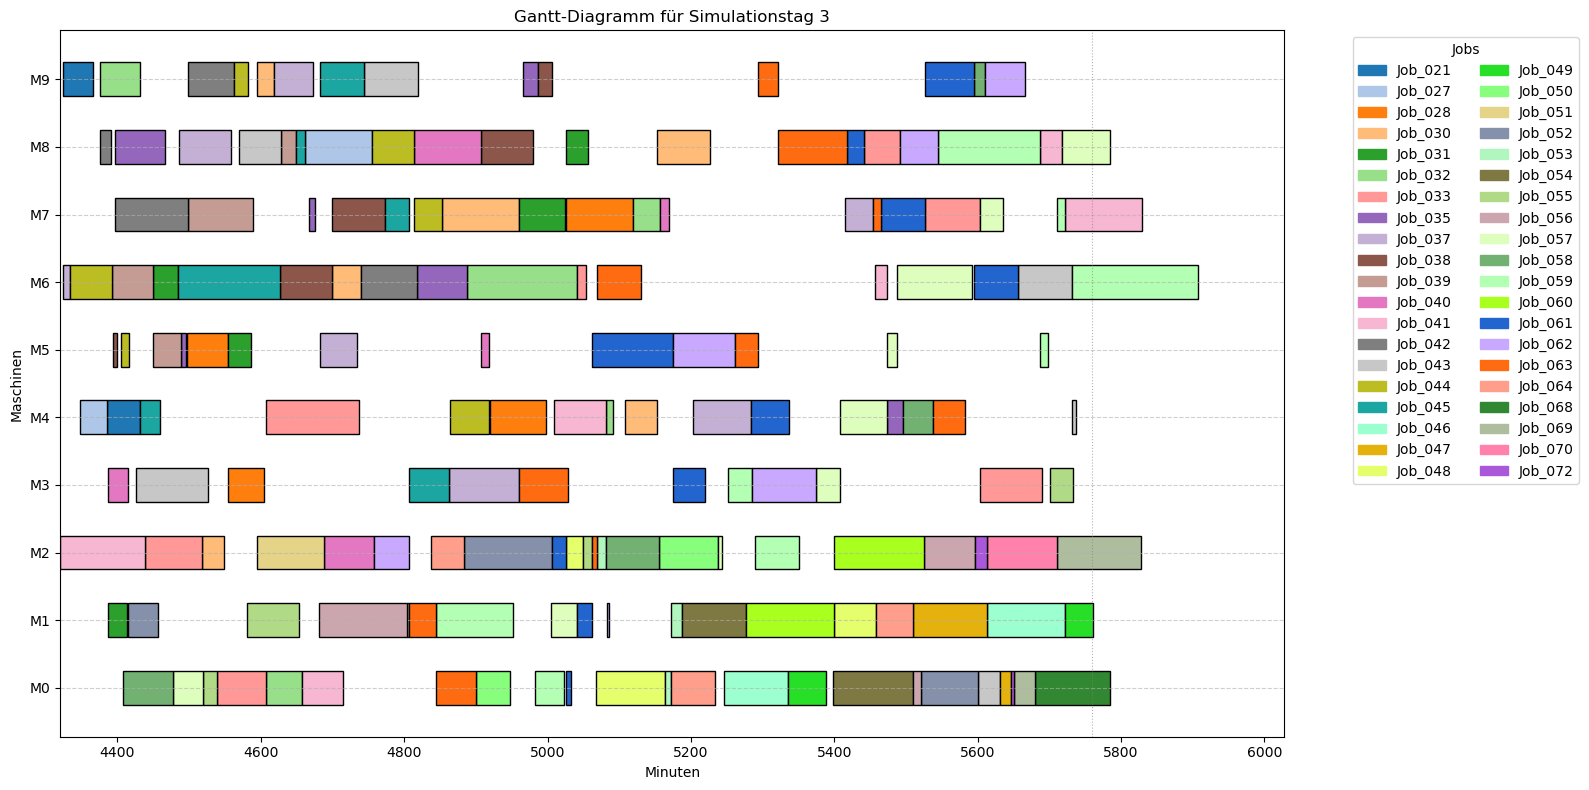

bi_criteria_sum_tardiness_deviation ...

Solver-Informationen:
  Zielfunktionswert       : 498676.3561
  Solver-Status           : Optimal
  Anzahl Variablen        : 40144
  Anzahl Constraints      : 79221


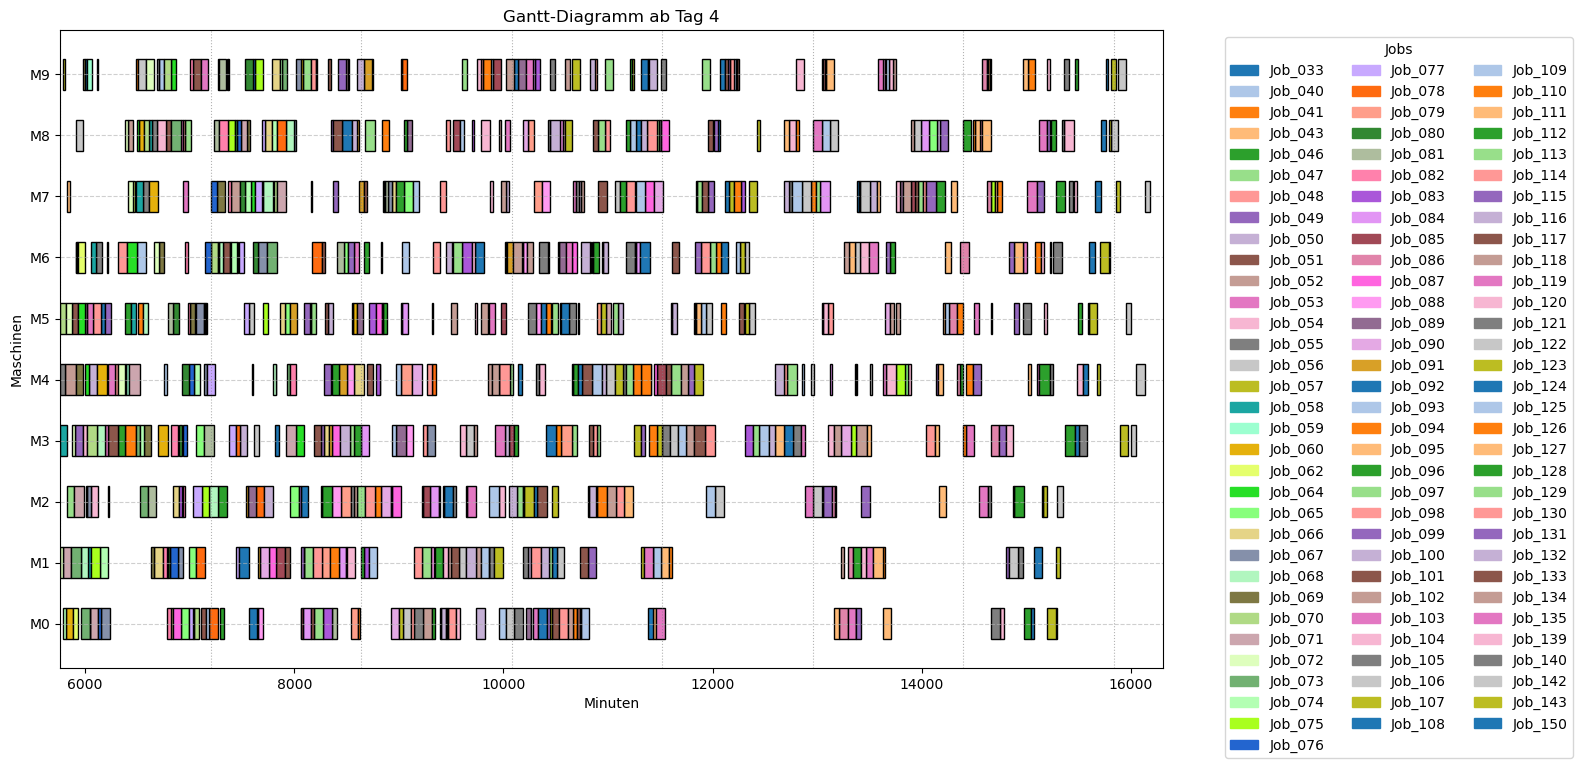

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.

[96:00:00] Job_055 started on M4
[96:00:00] Job_058 started on M3
[96:00:52] Job_070 started on M1
[96:02:50] Job_070 finished on M1 (after 01 minute 58 seconds)
[96:02:52] Job_072 started on M1
[96:02:52] Job_070 started on M5
[96:16:28] Job_072 finished on M1 (after 13 minutes 37 seconds)
[96:24:06] Job_057 started on M9
[96:24:49] Job_074 started on M0
[96:24:52] Job_071 started on M1
[96:44:04] Job_055 finished on M4 (after 44 minutes 04 seconds)
[96:49:00] Job_052 started on M4
[96:49:32] Job_058 finished on M3 (after 49 minutes 32 seconds)
[96:49:46] Job_070 finished on M5 (after 46 minutes 55 seconds)
[96:49:46] Job_074 finished on M0 (after 24 minutes 58 seconds)
[96:53:49] Job_060 started on M0
[96:54:52] Job_072 started on M5
[97:07:43] Job_047 started on M

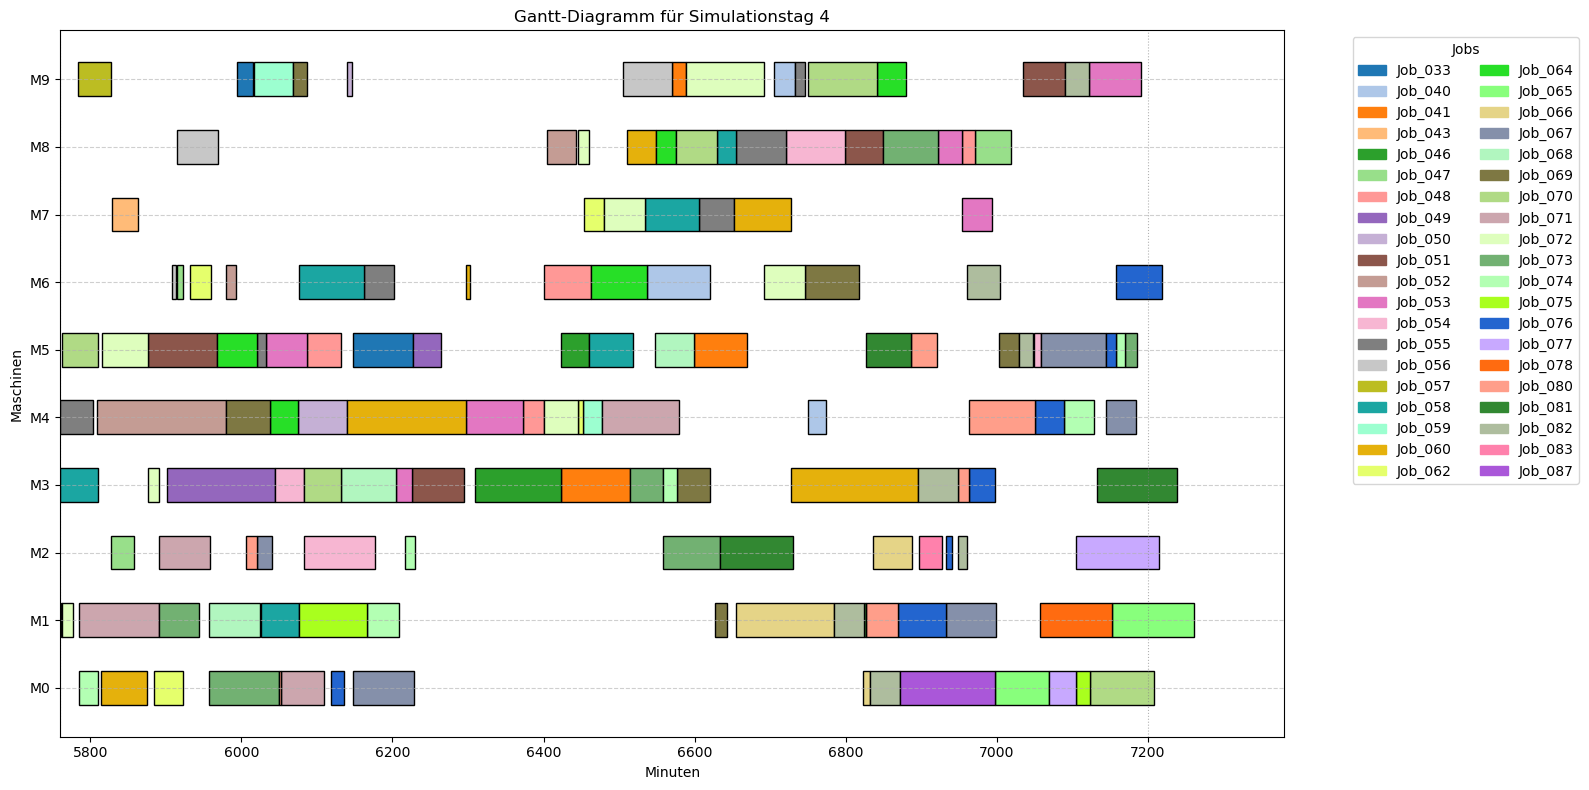

In [9]:
reschedul.run_multi_day_rescheduling(first_start=1, last_planning_start=4,
                                     day_length=day_length, horizon_days=horizon_days,
                                     df_times=df_times, df_jssp=df_jssp,
                                     df_execution=df_execution, df_undone=df_undone,
                                     df_plan=df_plan,
                                     notebook_prefix=notebook_prefix,
                                     rescheduler="bi_criteria_sum_tardiness_deviation",
                                     solver_limit=solver_limit,
                                     plot_results=True, this_r=0.4
)
